In [1]:
import scipp as sc
import os
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib notebook

Loading data

In [2]:
tiff_file = "../working_with_images/TIFF/images/Turb0096.tif"
assert os.path.exists(tiff_file)

In [3]:
im_pil = Image.open(tiff_file)
print(type(im_pil))

<class 'PIL.TiffImagePlugin.TiffImageFile'>


In [4]:
data = np.array(im_pil, dtype=np.float32)

Converting data into scipp

In [5]:
sc_data = sc.DataArray(data=sc.Variable(dims=['y', 'x'],
                                        values=data))

Trying 3D array (will be useful for SNAP imaging data) 

In [6]:
data3d = np.random.rand(10,50,50)

In [7]:
sc_3ddata = sc.DataArray(data=sc.Variable(dims=['tof', 'y', 'x'],
                                          values=data3d),
                        coords={
                            'tof': sc.Variable(['tof'], values=np.arange(10), 
                                               unit=sc.units.s),
                            'y': sc.Variable(['y'], values=np.arange(50)*0.7*1e-6,
                                            unit=sc.units.m),
                            'x': sc.Variable(['x'], values=np.arange(50)*0.7*1e-6,
                                            unit=sc.units.m),
                        })

In [8]:
sc.show(sc_3ddata)

In [9]:
sc_3ddata

<scipp.DataArray>
Dimensions: {{tof, 10}, {y, 50}, {x, 50}}
Coordinates:
    tof                       int64      [s]              (tof)  [0, 1, ..., 8, 9]
    x                         float64    [m]              (x)  [0.000000, 0.000001, ..., 0.000034, 0.000034]
    y                         float64    [m]              (y)  [0.000000, 0.000001, ..., 0.000034, 0.000034]
Data:
                              float64    [dimensionless]  (tof, y, x)  [0.487038, 0.432857, ..., 0.359657, 0.280790]

In [10]:
sc_3ddata.data

<scipp.VariableView>      float64    [dimensionless]  (tof, y, x)  [0.487038, 0.432857, ..., 0.359657, 0.280790]

In [16]:
plt.show(sc_3ddata.data)

In [18]:
my_data = np.array(sc_3ddata.data)
np.shape(my_data)

(10, 50, 50)

<IPython.core.display.Javascript object>


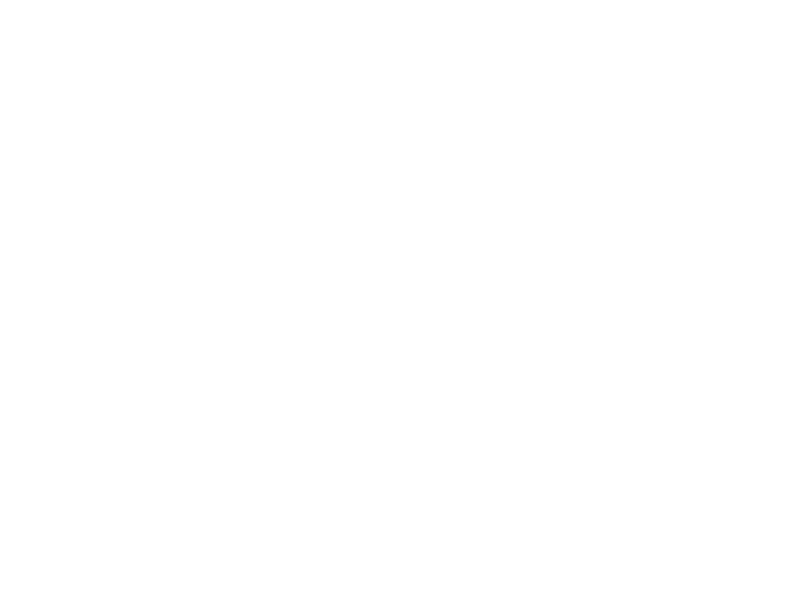

In [22]:
plt.figure()
plt.show(my_data)
